## Lead-Score Case Study

In [160]:
#Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

#importing libraries
import numpy as np
import pandas as pd

#for plotting
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set(style="darkgrid")

In [161]:
#importing dataset
leads = pd.read_csv("leads.csv")

In [162]:
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


### Data Pre-processing

In [163]:
#uniqueness check
print(len(leads["Prospect ID"].unique()))
print(len(leads["Lead Number"].unique()))

9240
9240


No Duplication

#### Data Cleaning

In [164]:
#replace select with Nulls as we have lot of selects in data

leads = leads.replace('Select', np.nan)

In [165]:
#Target variable 

print(len(leads[(leads.Converted == 1 )]))
print(len(leads[(leads.Converted == 0 )]))

print("Percentage of target variable",
      len(leads[(leads.Converted == 1 )])/ (len(leads[(leads.Converted == 1 )]) + len(leads[(leads.Converted == 0 )])))


3561
5679
Percentage of target variable 0.3853896103896104


38% of leads got converted and not a highly imbalanced class

In [166]:
#Nulls in data
leads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [167]:
#nulls in lead converted vs lead not converted
#Here 12 is taken by trail and error, where I got minimun % of nulls with converted data 

# leads_conv  = leads[leads.Converted == 1]

# print(len(leads_conv))
# print(len(leads_conv[leads_conv.isnull().sum(axis = 1) > 5]))
# print(len(leads[leads.isnull().sum(axis = 1) > 5]))


In [168]:
#will first remove those 415 rows with nulls more than 12 

# leads = leads[~((leads.Converted == 0 ) & (leads.isnull().sum(axis = 1) > 12))]
# leads.shape

In [169]:
#Checking the rows which are having high nulls more than or equal to 10

leads.shape


(9240, 37)

In [170]:
#percentage of nulls
print(round((leads.isnull().sum()/leads.shape[0])*100,2).sort_values(ascending = False))


How did you hear about X Education               78.46
Lead Profile                                     74.19
Lead Quality                                     51.59
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Index                       45.65
Asymmetrique Activity Index                      45.65
City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Lead Origin                                       0.00
Lead Numbe

Droping data

In [171]:
#removing columns with nulls nearly equal to 30% 
leads = leads.drop(['Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score',
                    'Asymmetrique Profile Score','Lead Quality','How did you hear about X Education',
                    'Lead Profile','Tags','What matters most to you in choosing a course',
                   'What is your current occupation','Country','Specialization','City'],axis = 1)


In [172]:
#columns for after the lead got converted, so no use in pretention of lead,So dropping those

leads = leads.drop(["I agree to pay the amount through cheque","A free copy of Mastering The Interview",
                    "Last Notable Activity"],axis = 1)


In [173]:
#Dropping Id's
leads = leads.drop(['Prospect ID','Lead Number'],axis = 1)

In [174]:
#fields having very very less info

# print(len(leads[leads.Search == "Yes"]))
# print(len(leads[leads.Magazine == "Yes"]))
# print(len(leads[leads.Newspaper == "Yes"]))
# print(len(leads[leads["Newspaper Article"] == "Yes"]))

# print(len(leads[leads["X Education Forums"] == "Yes"]))
# print(len(leads[leads["Digital Advertisement"] == "Yes"]))
# print(len(leads[leads["Through Recommendations"] == "Yes"]))
# print(len(leads[leads["Receive More Updates About Our Courses"] == "Yes"]))


# print(len(leads[leads["Do Not Call"] == "Yes"]))
# #print(len(leads[leads["Do Not Email"] == "Yes"]))
# print(len(leads[leads["Update me on Supply Chain Content"] == "Yes"]))
# print(len(leads[leads["Get updates on DM Content"] == "Yes"]))
# print(len(leads[leads["I agree to pay the amount through cheque"] == "Yes"]))
# print(len(leads[leads["What matters most to you in choosing a course"] != "Better Career Prospects"]))



In [175]:
#droping columns which are having very less info

# leads = leads.drop(["Search","Magazine","Newspaper","Newspaper Article","X Education Forums","Digital Advertisement",
#                     "Through Recommendations","Receive More Updates About Our Courses","Do Not Call",
#                     "Update me on Supply Chain Content","Get updates on DM Content",
#                     "I agree to pay the amount through cheque",
##                     "What matters most to you in choosing a course","Country"],axis = 1)

In [176]:
#Checking percentages of nulls again
print(round((leads.isnull().sum()/leads.shape[0])*100,2))
print(leads.shape)

Lead Origin                               0.00
Lead Source                               0.39
Do Not Email                              0.00
Do Not Call                               0.00
Converted                                 0.00
TotalVisits                               1.48
Total Time Spent on Website               0.00
Page Views Per Visit                      1.48
Last Activity                             1.11
Search                                    0.00
Magazine                                  0.00
Newspaper Article                         0.00
X Education Forums                        0.00
Newspaper                                 0.00
Digital Advertisement                     0.00
Through Recommendations                   0.00
Receive More Updates About Our Courses    0.00
Update me on Supply Chain Content         0.00
Get updates on DM Content                 0.00
dtype: float64
(9240, 19)


In [177]:
#Replacing null values of numeric columns with 0

leads["TotalVisits"].fillna(0,inplace=True)
leads["Page Views Per Visit"].fillna(0,inplace=True)


In [178]:
#Removing rows with have nulls for categorical columns

leads = leads[~pd.isnull(leads['Last Activity'])]
leads = leads[~pd.isnull(leads['Lead Source'])]


In [179]:
#Again checking nulls

print(round((leads.isnull().sum()/leads.shape[0])*100,2))


Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Do Not Call                               0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Search                                    0.0
Magazine                                  0.0
Newspaper Article                         0.0
X Education Forums                        0.0
Newspaper                                 0.0
Digital Advertisement                     0.0
Through Recommendations                   0.0
Receive More Updates About Our Courses    0.0
Update me on Supply Chain Content         0.0
Get updates on DM Content                 0.0
dtype: float64


Now our data is cleaned we are good to go!!

#### Dummy variable creation

In [180]:
varlist =  ['Do Not Email','Do Not Call','Magazine', 'Newspaper Article','X Education Forums','Newspaper',
            'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
            'Update me on Supply Chain Content','Get updates on DM Content']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
leads[varlist] = leads[varlist].apply(binary_map)

In [181]:
leads.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content
0,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,No,0,0,0,0,0,0,0,0,0
1,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,No,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,No,0,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,No,0,0,0,0,0,0,0,0,0
4,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,No,0,0,0,0,0,0,0,0,0


In [182]:
#seperating numeric columns
num_cols = leads.dtypes[leads.dtypes != "object"].index

In [183]:
#seperating categorical columns
cat_cols = leads.dtypes[leads.dtypes == "object"].index

In [184]:
print(cat_cols)

Index(['Lead Origin', 'Lead Source', 'Last Activity', 'Search'], dtype='object')


In [185]:
# Get the dummy variables for the feature
status = pd.get_dummies(leads[cat_cols],drop_first = True)

# Check what the dataset 'status' looks like
status.head()


,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,...,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Search_Yes
0,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [186]:
# Add the results to the original housing dataframe
leads = pd.concat([leads, status], axis = 1)

# Drop 'cat_cols' as we have created the dummies for it
leads.drop(cat_cols, axis = 1,inplace = True)
    
# Now let's see the head of our dataframe.
leads.head()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Magazine,Newspaper Article,X Education Forums,Newspaper,...,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Search_Yes
0,0,0,0,0.0,0,0.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,5.0,674,2.5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,2.0,1532,2.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1.0,305,1.0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,2.0,1428,1.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [187]:
leads.shape

(9103, 55)

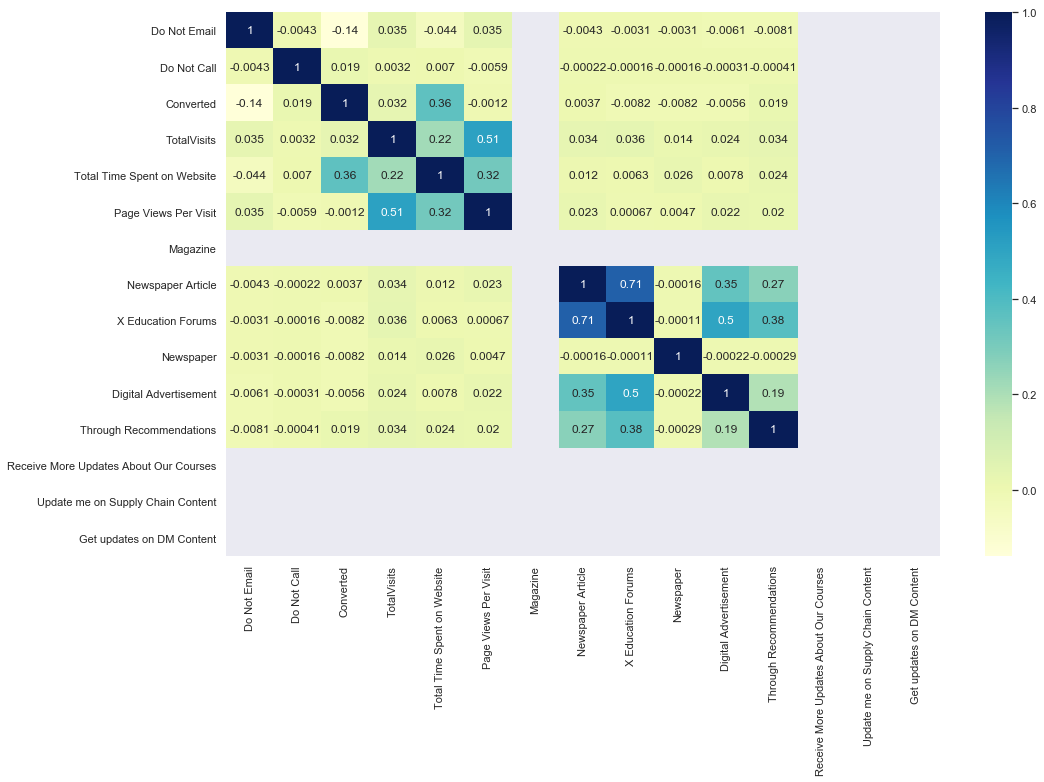

In [188]:
#Correlations of only numerical data
plt.figure(figsize = (16, 10))
sns.heatmap(leads[num_cols].corr(), annot = True, cmap="YlGnBu")
plt.show()

There is not enough data to show correlations for some columns as there is very low significant data
Not much correlations as well

Lets go with RFE rather than PCA as data is not correlated

And let our RFE to decide which columns are significant and which are not significant

### Model Building


Let's start by splitting our data into a training set and a test set.

Running First Training Model

In [189]:
#seperating train and test data
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(leads, train_size = 0.8, test_size = 0.2, random_state = 100)

In [190]:
##Scaling train and test data seperately

In [191]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [192]:
df_train[num_cols] = scaler.fit_transform(df_train[num_cols])
df_test[num_cols] = scaler.fit_transform(df_test[num_cols])

df_train.head()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Magazine,Newspaper Article,X Education Forums,Newspaper,...,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Search_Yes
8999,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
6902,1.0,0.0,0.0,0.003984,0.219707,0.018182,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
7594,1.0,0.0,0.0,0.011952,0.093209,0.054545,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1485,0.0,0.0,0.0,0.011952,0.114514,0.054545,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4131,0.0,0.0,1.0,0.007968,0.303151,0.036364,0.0,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,0


In [193]:
#seperating target variable from train
y_train = df_train.pop('Converted')
X_train = df_train


In [194]:
#seperating target variable from test
y_test = df_test.pop('Converted')
X_test = df_test

In [195]:
import statsmodels.api as sm

In [196]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7282
Model:                            GLM   Df Residuals:                     7232
Model Family:                Binomial   Df Model:                           49
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 10 Jun 2019   Deviance:                          nan
Time:                        17:40:27   Pearson chi2:                 8.07e+18
No. Iterations:                   100   Covariance Type:             nonrobust
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                       3.373e+15   6.64e+07   5.08e+07      0.000    3.37e+15    3.37e+15
Do Not Email                               -7.534e+14   4.15e+06  -1.82e+08      0.000   -7.53e+14   -7.53e+14
Do Not Call                                 4.006e+15   6.73e+07   5.96e+07      0.000    4.01e+15    4.01e+15
TotalVisits                                 2.851e+15   4.53e+07    6.3e+07      0.000    2.85e+15    2.85e+15
Total Time Spent on Website                 1.001e+15    3.7e+06   2.71e+08      0.000       1e+15       1e+15
Page Views Per Visit                        1.455e+15   2.85e+07    5.1e+07      0.000    1.46e+15    1.46e+15
Magazine                                      12.2725   4.78e-07   2.56e+07      0.000      12.273      12.273
Newspaper Article                           4.649e+15   6.72e+07   6.92e+07      0.000    4.65e+15    4.65e+15
X Education Forums                         -7.807e+15   1.08e+08  -7.23e+07      0.000   -7.81e+15   -7.81e+15
Newspaper                                    6.17e+13   6.72e+07   9.19e+05      0.000    6.17e+13    6.17e+13
Digital Advertisement                       -1.51e+15   3.88e+07  -3.89e+07      0.000   -1.51e+15   -1.51e+15
Through Recommendations                     1.185e+15   3.14e+07   3.78e+07      0.000    1.19e+15    1.19e+15
Receive More Updates About Our Courses        -9.5289   3.28e-07   -2.9e+07      0.000      -9.529      -9.529
Update me on Supply Chain Content             22.9398   4.51e-07   5.08e+07      0.000      22.940      22.940
Get updates on DM Content                    -27.7807   2.79e-07  -9.96e+07      0.000     -27.781     -27.781
Lead Origin_Landing Page Submission        -1.228e+14   2.36e+06   -5.2e+07      0.000   -1.23e+14   -1.23e+14
Lead Origin_Lead Add Form                   4.599e+14   4.75e+07   9.68e+06      0.000     4.6e+14     4.6e+14
Lead Origin_Lead Import                     5.781e+15   6.82e+07   8.48e+07      0.000    5.78e+15    5.78e+15
Lead Source_Direct Traffic                 -9.754e+13   6.13e+07  -1.59e+06      0.000   -9.75e+13   -9.75e+13
Lead Source_Facebook                       -4.751e+15   9.09e+07  -5.23e+07      0.000   -4.75e+15   -4.75e+15
Lead Source_Google                          2.921e+14   6.13e+07   4.77e+06      0.000    2.92e+14    2.92e+14
Lead Source_Live Chat                       3.997e+15   7.75e+07   5.16e+07      0.000       4e+15       4e+15
Lead Source_NC_EDM                          4.935e+15   9.09e+07   5.43e+07      0.000    4.93e+15    4.93e+15
Lead Source_Olark Chat                      4.838e+14   6.13e+07   7.89e+06      0.000    4.84e+14    4.84e+14
Lead Source_Organic Search                  3.829e+13   6.13e+07   6.24e+05      0.000    3.83e+13    3.83e+13
Lead Source_Pay per Click Ads                 10.4509 

In [197]:
##RFE

In [198]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [199]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [200]:
rfe.support_

array([ True, False,  True,  True, False, False, False, False,  True,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False,  True, False, False, False,  True,
       False, False, False,  True, False, False,  True, False, False,
       False,  True,  True, False, False, False, False, False,  True,
        True, False, False,  True, False,  True, False, False, False])

In [201]:
col = X_train.columns[rfe.support_]
X_train.columns[~rfe.support_]

Index(['Do Not Call', 'Page Views Per Visit', 'Magazine', 'Newspaper Article',
       'X Education Forums', 'Digital Advertisement',
       'Through Recommendations', 'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'Lead Source_Direct Traffic', 'Lead Source_Facebook',
       'Lead Source_Google', 'Lead Source_Live Chat', 'Lead Source_NC_EDM',
       'Lead Source_Organic Search', 'Lead Source_Pay per Click Ads',
       'Lead Source_Press_Release', 'Lead Source_Referral Sites',
       'Lead Source_Social Media', 'Lead Source_WeLearn', 'Lead Source_bing',
       'Lead Source_blog', 'Lead Source_testone',
       'Lead Source_welearnblog_Home', 'Lead Source_youtubechannel',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Marked Spam',
       'Last Activity_Email Opened', 'Last Activity_Email Received',
       'Last Activity_Form S

In [202]:
#Model1
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7282
Model:                            GLM   Df Residuals:                     7266
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3307.3
Date:                Mon, 10 Jun 2019   Deviance:                       6614.6
Time:                        17:40:28   Pearson chi2:                 7.55e+03
No. Iterations:                    20   Covariance Type:             nonrobust
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -2.3329      0.075    -30.993      0.000      -2.480      -2.185
Do Not Email                              -1.3942      0.180     -7.735      0.000      -1.748      -1.041
TotalVisits                                5.8335      1.802      3.237      0.001       2.301       9.366
Total Time Spent on Website                4.6459      0.148     31.438      0.000       4.356       4.936
Newspaper                                -23.2021   2.92e+04     -0.001      0.999   -5.73e+04    5.73e+04
Lead Origin_Lead Add Form                  1.9816      0.949      2.089      0.037       0.122       3.841
Lead Source_Olark Chat                     1.2971      0.097     13.410      0.000       1.108       1.487
Lead Source_Reference                      2.2882      0.968      2.363      0.018       0.390       4.186
Lead Source_Welingak Website               4.4169      1.383      3.193      0.001       1.706       7.128
Lead Source_google                       -20.8187   1.34e+04     -0.002      0.999   -2.63e+04    2.62e+04
Last Activity_Converted to Lead           -0.8542      0.181     -4.727      0.000      -1.208      -0.500
Last Activity_Email Bounced               -0.6272      0.320     -1.963      0.050      -1.253      -0.001
Last Activity_Had a Phone Conversation     1.3833      0.509      2.715      0.007       0.385       2.382
Last Activity_Olark Chat Conversation     -1.5476      0.148    -10.482      0.000      -1.837      -1.258
Last Activity_SMS Sent                     1.2616      0.068     18.652      0.000       1.129       1.394
Last Activity_Unsubscribed                 0.9836      0.419      2.345      0.019       0.161       1.806
==========================================================================================================
"""

In [203]:
X_train_new = X_train_sm.drop(['const'], axis=1)

In [204]:
#droping columns
X_train_new = X_train_new.drop(['Newspaper'], axis=1)
X_train_new = X_train_new.drop(['Lead Source_google'], axis=1)

### Model2


In [205]:
X_train_sm = sm.add_constant(X_train_new)
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7282
Model:                            GLM   Df Residuals:                     7268
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3310.7
Date:                Mon, 10 Jun 2019   Deviance:                       6621.5
Time:                        17:40:28   Pearson chi2:                 7.56e+03
No. Iterations:                     7   Covariance Type:             nonrobust
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -2.3326      0.075    -31.023      0.000      -2.480      -2.185
Do Not Email                              -1.3919      0.180     -7.725      0.000      -1.745      -1.039
TotalVisits                                5.7690      1.796      3.213      0.001       2.250       9.288
Total Time Spent on Website                4.6361      0.148     31.413      0.000       4.347       4.925
Lead Origin_Lead Add Form                  1.9821      0.948      2.090      0.037       0.123       3.841
Lead Source_Olark Chat                     1.2957      0.097     13.404      0.000       1.106       1.485
Lead Source_Reference                      2.2863      0.968      2.362      0.018       0.389       4.184
Lead Source_Welingak Website               4.4145      1.383      3.192      0.001       1.704       7.125
Last Activity_Converted to Lead           -0.8507      0.181     -4.710      0.000      -1.205      -0.497
Last Activity_Email Bounced               -0.6253      0.319     -1.958      0.050      -1.251       0.001
Last Activity_Had a Phone Conversation     1.3868      0.509      2.723      0.006       0.389       2.385
Last Activity_Olark Chat Conversation     -1.5450      0.148    -10.467      0.000      -1.834      -1.256
Last Activity_SMS Sent                     1.2644      0.068     18.702      0.000       1.132       1.397
Last Activity_Unsubscribed                 0.9851      0.419      2.350      0.019       0.163       1.807
==========================================================================================================
"""

In [206]:

X_train_new = X_train_new.drop(['Last Activity_Unsubscribed'], axis=1)
X_train_new = X_train_new.drop(['Last Activity_Email Bounced'], axis=1)


In [207]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Lead Origin_Lead Add Form,80.87
5,Lead Source_Reference,63.58
6,Lead Source_Welingak Website,18.36
2,Total Time Spent on Website,1.57
4,Lead Source_Olark Chat,1.41
10,Last Activity_SMS Sent,1.41
9,Last Activity_Olark Chat Conversation,1.39
1,TotalVisits,1.37
0,Do Not Email,1.05
7,Last Activity_Converted to Lead,1.03


In [208]:
X_train_new = X_train_new.drop(['Lead Origin_Lead Add Form'], axis=1)

In [209]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Total Time Spent on Website,1.57
3,Lead Source_Olark Chat,1.41
9,Last Activity_SMS Sent,1.41
8,Last Activity_Olark Chat Conversation,1.39
1,TotalVisits,1.37
4,Lead Source_Reference,1.06
0,Do Not Email,1.05
6,Last Activity_Converted to Lead,1.03
5,Lead Source_Welingak Website,1.02
7,Last Activity_Had a Phone Conversation,1.01


### model3

In [210]:
X_train_sm = sm.add_constant(X_train_new)
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7282
Model:                            GLM   Df Residuals:                     7271
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3318.8
Date:                Mon, 10 Jun 2019   Deviance:                       6637.6
Time:                        17:40:29   Pearson chi2:                 7.52e+03
No. Iterations:                     7   Covariance Type:             nonrobust
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -2.3341      0.075    -31.217      0.000      -2.481      -2.188
Do Not Email                              -1.4724      0.145    -10.188      0.000      -1.756      -1.189
TotalVisits                                5.9928      1.797      3.334      0.001       2.470       9.515
Total Time Spent on Website                4.6263      0.147     31.390      0.000       4.337       4.915
Lead Source_Olark Chat                     1.2948      0.097     13.400      0.000       1.105       1.484
Lead Source_Reference                      4.2672      0.209     20.452      0.000       3.858       4.676
Lead Source_Welingak Website               6.4081      1.009      6.348      0.000       4.430       8.386
Last Activity_Converted to Lead           -0.8475      0.180     -4.698      0.000      -1.201      -0.494
Last Activity_Had a Phone Conversation     1.3878      0.509      2.724      0.006       0.389       2.386
Last Activity_Olark Chat Conversation     -1.5423      0.147    -10.460      0.000      -1.831      -1.253
Last Activity_SMS Sent                     1.2710      0.067     19.076      0.000       1.140       1.402
==========================================================================================================
"""

### Predictions

In [211]:
X_train_sm.shape

(7282, 11)

In [212]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [213]:
y_train_pred[:10]

array([0.26128766, 0.05918044, 0.03544701, 0.1502417 , 0.59559816,
       0.88689633, 0.87358977, 0.22196251, 0.01705717, 0.53455856])

In [214]:
#
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conv_Prob':y_train_pred})
y_train_pred_final['ID'] = y_train.index
y_train_pred_final.head()

,Converted,Conv_Prob,ID
0,1.0,0.261288,8999
1,0.0,0.059180,6902
2,0.0,0.035447,7594
3,0.0,0.150242,1485
4,1.0,0.595598,4131


In [215]:
y_train_pred_final['predicted'] = y_train_pred_final.Conv_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Conv_Prob,ID,predicted
0,1.0,0.261288,8999,0
1,0.0,0.059180,6902,0
2,0.0,0.035447,7594,0
3,0.0,0.150242,1485,0
4,1.0,0.595598,4131,1


In [216]:
from sklearn import metrics

In [217]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3955  557]
 [ 925 1845]]


In [218]:
#Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.7964844822850865


In [219]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] 

In [220]:
print("Sensitivity",TP / float(TP+FN))
print("Specificity",TN / float(TN+FP))

print(FP/ float(TN+FP))
print (TP / float(TP+FP))
print (TN / float(TN+ FN))

Sensitivity 0.6660649819494585
Specificity 0.8765514184397163
0.12344858156028368
0.7681099084096586
0.8104508196721312


In [221]:
#Lead-score calculation


#### Tuning to 80%

As the CEO expected the conversion rate to be 80 % we have to make sensitivity 80 % by decreasing the cutoff

In [222]:
y_train_pred_final['predicted'] = y_train_pred_final.Conv_Prob.map(lambda x: 1 if x > 0.33 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Conv_Prob,ID,predicted
0,1.0,0.261288,8999,0
1,0.0,0.059180,6902,0
2,0.0,0.035447,7594,0
3,0.0,0.150242,1485,0
4,1.0,0.595598,4131,1


In [223]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] 

print("sensitivity",TP / float(TP+FN))
print("Specificity",TN / float(TN+FP))

print(FP/ float(TN+FP))
print (TP / float(TP+FP))
print (TN / float(TN+ FN))

[[3486 1026]
 [ 545 2225]]
0.7842625652293326
sensitivity 0.8032490974729242
Specificity 0.7726063829787234
0.22739361702127658
0.6844047985235312
0.8647978169188787


##ROC

In [224]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [225]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conv_Prob, drop_intermediate = False )

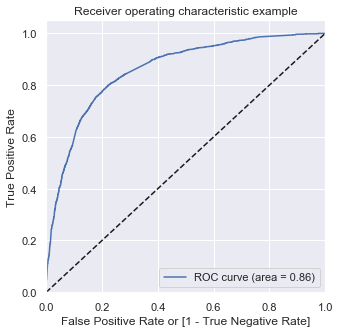

In [226]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conv_Prob)

#### Finding Optimal Cutoff Point

In [227]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conv_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conv_Prob,ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1.0,0.261288,8999,0,1,1,1,0,0,0,0,0,0,0
1,0.0,0.059180,6902,0,1,0,0,0,0,0,0,0,0,0
2,0.0,0.035447,7594,0,1,0,0,0,0,0,0,0,0,0
3,0.0,0.150242,1485,0,1,1,0,0,0,0,0,0,0,0
4,1.0,0.595598,4131,1,1,1,1,1,1,1,0,0,0,0


In [228]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.380390  1.000000  0.000000
0.1   0.1  0.548201  0.974729  0.286348
0.2   0.2  0.706262  0.912635  0.579566
0.3   0.3  0.774650  0.822022  0.745567
0.4   0.4  0.795523  0.748736  0.824246
0.5   0.5  0.796484  0.666065  0.876551
0.6   0.6  0.771354  0.533935  0.917110
0.7   0.7  0.753227  0.442599  0.943927
0.8   0.8  0.724938  0.330325  0.967199
0.9   0.9  0.674128  0.162455  0.988254


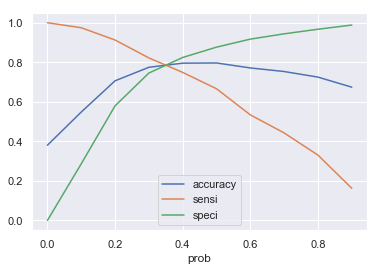

In [229]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

####  Making predictions on the test set

In [230]:
columns = X_train_new.columns
X_test = X_test[columns]
X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent
3497,0.0,0.000000,0.000000,0,1,0,0,0,0,0
4044,0.0,0.000000,0.000000,1,0,0,0,0,0,1
7200,0.0,0.035714,0.066021,0,0,0,1,0,0,0
1183,0.0,0.000000,0.000000,1,0,0,0,0,0,0
8216,0.0,0.250000,0.015405,0,0,0,0,0,0,0


In [231]:
X_test_sm = sm.add_constant(X_test)

In [232]:
y_test_pred = res.predict(X_test_sm)

In [233]:

y_test_pred[:10]

3497    0.873590
4044    0.557682
7200    0.065244
1183    0.261288
8216    0.317639
8746    0.261288
9047    0.293735
6526    0.820645
7694    0.261288
8184    0.918459
dtype: float64

In [234]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [235]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [236]:
# Putting CustID to index
y_test_df['ID'] = y_test_df.index

In [237]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [238]:
y_pred_final= y_pred_final.rename(columns={ 0 : 'Conv_Prob'})

In [239]:
y_pred_final['predicted'] = y_pred_final.Conv_Prob.map(lambda x: 1 if x > 0.35 else 0)

In [240]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.predicted)

0.7226798462383306

In [241]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.predicted )
confusion2

array([[722, 417],
       [ 88, 594]], dtype=int64)

In [242]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
print("sensitivity",TP / float(TP+FN))
print("specificity",TN / float(TN+FP))
print(FP/ float(TN+FP))
print (TP / float(TP+FP))
print (TN / float(TN+ FN))

sensitivity 0.8709677419354839
specificity 0.6338893766461808
0.36611062335381916
0.5875370919881305
0.891358024691358


#### Lead Score Calculation


In [243]:
y_train_pred_final = y_train_pred_final.reindex_axis(['Converted','ID','Conv_Prob','predicted'], axis=1)

In [244]:
final = pd.concat([y_train_pred_final,y_pred_final],axis = 0)


In [245]:
final = final.sort_values(by ='ID',ascending = True)

In [246]:
final["lead_score"] = round((final.Conv_Prob) * 100,2)

In [247]:
lead_score = final.loc[:,['ID','lead_score']]

In [248]:
lead_score.head()

,ID,lead_score
346,0,26.13
1923,1,30.35
7255,2,70.25
1748,3,18.26
2758,4,44.98
